# CLAIM AMOUNT PREDICTIONS FOR JOHNSON INSURANCE PLC

# **1. Problem Statement** <br>

* Building a predictive model that can provide the total amount of claim by a customer in seconds

# <b>2. Hypothesis Generation</b>

**a. Policy Deductable:** The monthly contributions on the policy might have the effect on the total amount of the claim by the customer<br>

**b. Incident Hour oF The Day:** Some insurance covers regulates the times which are covered by the insurance, this might be one of the affector determing the amount to beclaims<br>

**c. Number of Vehicles involved:** The third party claims will result in higher amounts to be paid to the client, if there is no a third party the amount will be less.

**e. Property Damage:** The type of property involved will result in higher claims. <br>

**f. Policy Annual Premium:** The overall contributions by the client might determine how much they client will  claim per incident<br>

**g. Umbrella Limit:** Claim limits can determine the number of times that a client can claim with a direct influence on the total claim amount<br>

**h. incident_type :** The type of the incident will determine the saverity and the amounts of damages, which will have an impact on whether the total claim is less or high.

**i. collision_type:** Losses will play the same role as capital gains, with direct impact to the amount paid to clients

**j. Months as Customer:** - Loyal customers who have spent many years with the company and contributed more towards their insurance covers could be the ones who's claims are processed quicker

**k. Incident Severity:** The severity of the incident will determine the level of damages which will directly determine the costs and the total claim amount


**j. Authorities Contacted:** Customers who file claims without reporting their incidents to obtain the incident report and case number will determine whether claims will be paid or not. <br>

**k. Witnesses:** Claims that have witnesses can strengthen the filed claim they also guarantee that the claim will be paid and the total amount paid wont have any penalties.<br>

**l. Auto Make:** The make of the vehicle will influence the total amount of the claim to be paid to the client. <br>

**m. Auto Model:** The model of the car will also determine the amount of claim

**n. Auto Year:** The age of the car will affect the amount to be paid to the client, cars that are still 1 to few years old will result in higher claim amounts

**o. Police Report Available:** Claims that do not have the police report might end up not be paid which will result in zero amount being paid, or the amount paid could be higher or accurate without penalties if there is a report

# 3. Loading Packages and Data

In [2790]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings #to ignore warnings
warnings.filterwarnings('ignore');

# DATA
<b>It consists of the training dataset and testing dataset</b><br>

<b>Training Data:</b> Will be used to train and test the model accuracy<br>
<b>Testing Data:</b> will be used for submission<br>

In [2791]:
#creating dataframes
load_train = pd.read_csv('train.csv', na_values=["?"]) #na_values will replace "?" with NaN
load_test = pd.read_csv('test.csv', na_values=["?"])
load_submission = pd.read_csv('sample_submission.csv')

#making copies to protect the original data
train_original = load_train.copy()
test_original = load_test.copy()
submission_originial = load_submission.copy()

train = load_train
test = load_test
sumbission = load_submission

# 4. Understandng the Data
* We check the structure of the train and test data.
* Look at the features present in the datasets

In [2792]:
#print first five rows and columns
train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67000
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00000
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,NaN,Volkswagen,Passat,2004,NaN,79560.00000
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,NaN,Toyota,Corolla,2012,NaN,121680.00000
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00000


In [2793]:
#shapes of the data
f'train: {train.shape}, test: {test.shape}'

'train: (700, 37), test: (300, 36)'

The training data contains 700 observations and the test contains 300 observations

In [2794]:
#features of training set
train.columns, len(train.columns)

(Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'capital-gains', 'capital-loss',
        'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
        'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
        'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'incident_date', 'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
        'police_report_available', 'auto_make', 'auto_model', 'auto_year',
        '_c39', 'total_claim_amount'],
       dtype='object'), 37)

In [2795]:
#print the data types 
train.dtypes

Customer_ID                     object
months_as_customer               int64
age                              int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
incident_date                   object
incident_type                   object
collision_type           

In [2796]:
train.total_claim_amount

0      14386.67000
1      76440.00000
2      79560.00000
3     121680.00000
4      80640.00000
          ...     
695   106400.00000
696   113733.33000
697    78466.67000
698    97866.67000
699    38400.00000
Name: total_claim_amount, Length: 700, dtype: float64

<b>The data consists of the following types</b><br>

<b> Independent Categorical Data</b><br>
<b> 7-Objects:</b><br>
        
   * Customer_ID, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship          
   * policy_bind_date, policy_state, incident_location, property_damage, incident_date, incident_type, auto_model, policy_csl                 
   * collision_type, incident_severity, authorities_contacted, incident_state, incident_city, police_report_available, auto_make
    
<b> Indepentent Numerical Data</b>

<b> Nominal Data</b><br>
* number_of_vehicles_involved
* bodily_injuries

<b> 13-Int64:</b><br>
    
   * months_as_customer, age, capital-gains, capital-loss, policy_number, policy_deductable, incident_hour_of_the_day
   * policy_annual_premium, umbrella_limit, insured_zip, witnesses, auto_year
   
<b> 3-Float </b><br>
   * _c39
   * policy_annual_premium

<b> Dependent/Target Variable</b><br>
<b> 1- float </b><br>
   * total_claim_amount (target variable)

<b>Target Variable</b><br>
* total_claim_amount (target variable)

# 5. Exploratory Data Analysis

# 5.1 Univariables Analysis

**We look at the analysis of each variable:**
* Categorical: Frequency table, Percentage distribution and Bar-plot
* Numerical: Probability density plot

* **Target Variable: total_claim_amount**

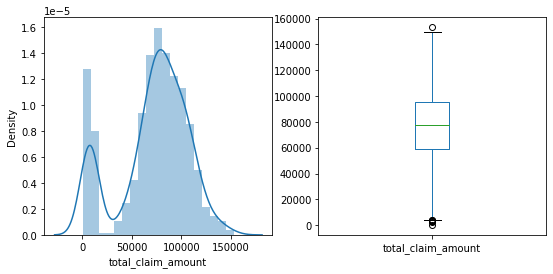

In [2797]:
#density distribution of total_claim_amount
plt.figure(1)

plt.subplot(121)
sns.distplot(train.total_claim_amount); #density distribution

plt.subplot(122)
train.total_claim_amount.plot.box(figsize = (9, 4))
plt.show()

* The train.total_claim_amount does not have any extreme values, the distribution is normal, majority of the claims where paid between 50k to 150k. 

* **policy_annual_premium**

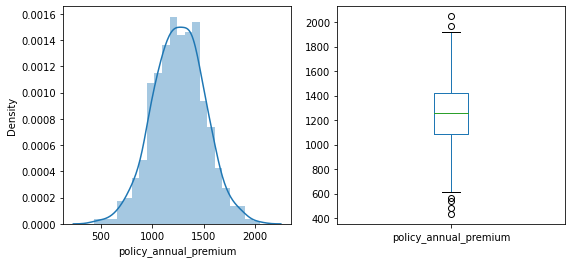

In [2798]:
# distribution of policy_annual_premium
plt.figure(1)
plt.subplot(121)
sns.distplot(train.policy_annual_premium)
plt.subplot(122)
train.policy_annual_premium.plot.box(figsize = (9, 4))
plt.show()

* **months_as_customer and age**

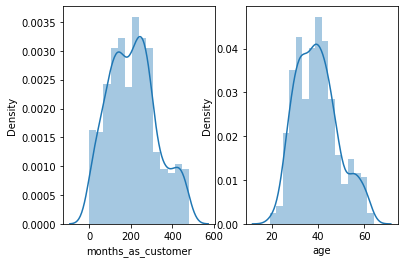

In [2799]:
# distribution of months_as_customer
plt.figure(1)
plt.subplot(121)
sns.distplot(train.months_as_customer)
plt.subplot(122)
sns.distplot(train.age)
plt.show()

* **capital-gains**

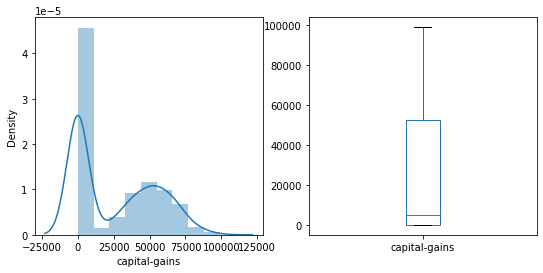

In [2800]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['capital-gains'])
plt.subplot(122)
train['capital-gains'].plot.box(figsize = (9, 4))
plt.show()

In [2801]:
train['capital-gains'].head()

0    51400
1        0
2        0
3        0
4    60200
Name: capital-gains, dtype: int64

* **capital-loss**

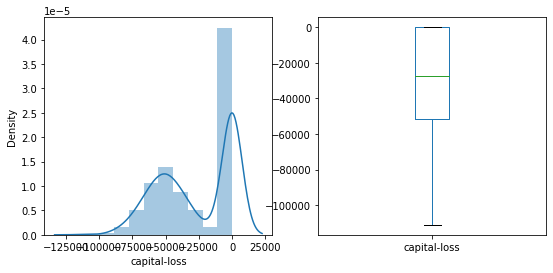

In [2802]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['capital-loss'])
plt.subplot(122)
train['capital-loss'].plot.box(figsize = (9, 4))
plt.show()

* **policy_deductable and incident_hour_of_the_day**

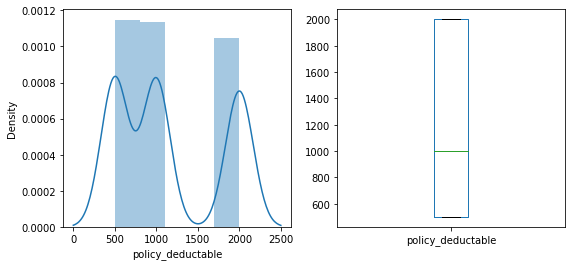

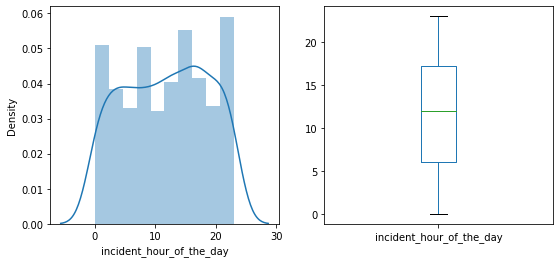

In [2803]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['policy_deductable'])
plt.subplot(122)
train['policy_deductable'].plot.box(figsize = (9, 4))
plt.show()

plt.figure(2)
plt.subplot(121)
sns.distplot(train.incident_hour_of_the_day)
plt.subplot(122)
train['incident_hour_of_the_day'].plot.box(figsize = (9, 4))
plt.show()

* **number_of_vehicles_involved**

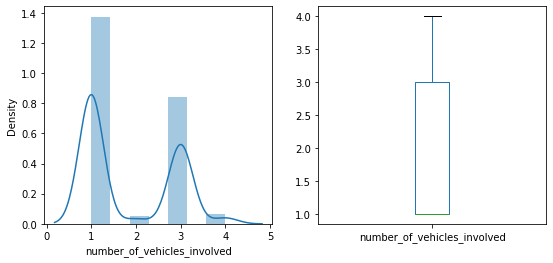

In [2804]:
plt.figure(2)
plt.subplot(121)
sns.distplot(train.number_of_vehicles_involved)
plt.subplot(122)
train['number_of_vehicles_involved'].plot.box(figsize = (9, 4))
plt.show()

* **bodily_injuries** 
* **number_of_vehicles_involved, witnesses**
* **authorities_contacted**

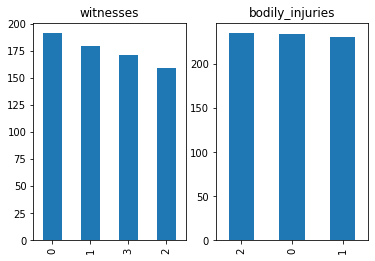

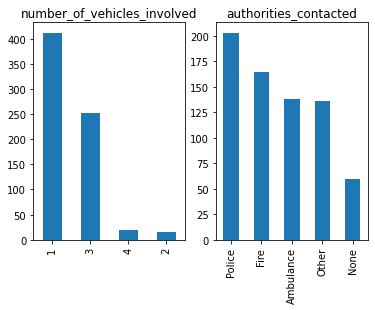

In [2805]:
#bar plot
plt.figure(1)
plt.subplot(121)
train['witnesses'].value_counts().plot.bar(title = 'witnesses');
plt.subplot(122)
#bar plot 
train.bodily_injuries.value_counts().plot.bar(title = 'bodily_injuries')
plt.figure(2)
plt.subplot(121)
train.number_of_vehicles_involved.value_counts().plot.bar(title = 'number_of_vehicles_involved')
plt.subplot(122)
train.authorities_contacted.value_counts().plot.bar(title = 'authorities_contacted')
plt.show()

* **police_report_available**
* **police_report_available**
* **incident_severity**
* **collision_type**

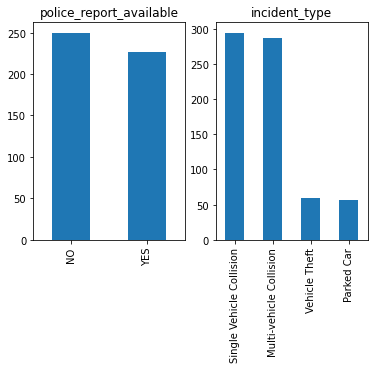

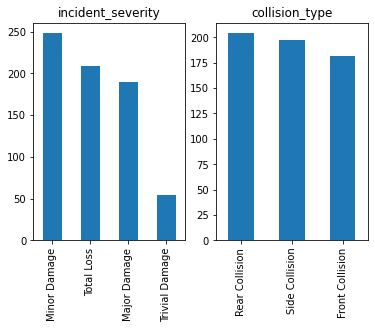

In [2806]:
#bar plot
plt.figure(1)
plt.subplot(121)
train['police_report_available'].value_counts().plot.bar(title = 'police_report_available');
plt.subplot(122)
#bar plot 
train.incident_type.value_counts().plot.bar(title = 'incident_type')

plt.figure(2)
plt.subplot(121)
train['incident_severity'].value_counts().plot.bar(title = 'incident_severity');
plt.subplot(122)
#bar plot 
train.collision_type.value_counts().plot.bar(title = 'collision_type')
plt.show()

* **auto_make**
* **insured_sex**
* **insured_relationship**
* **insured_education_level**

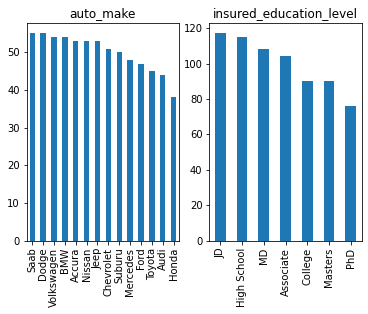

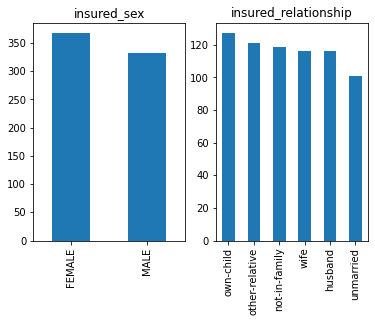

In [2807]:
#bar plot
plt.figure(1)
plt.subplot(121)
#bar plot 
train['auto_make'].value_counts().plot.bar(title = 'auto_make')
plt.subplot(122)
train['insured_education_level'].value_counts().plot.bar(title = 'insured_education_level')
plt.show()

plt.figure(2)
plt.subplot(121)
train.insured_sex.value_counts().plot.bar(title = 'insured_sex')
plt.subplot(122)
train.insured_relationship.value_counts().plot.bar(title = 'insured_relationship')

plt.show()

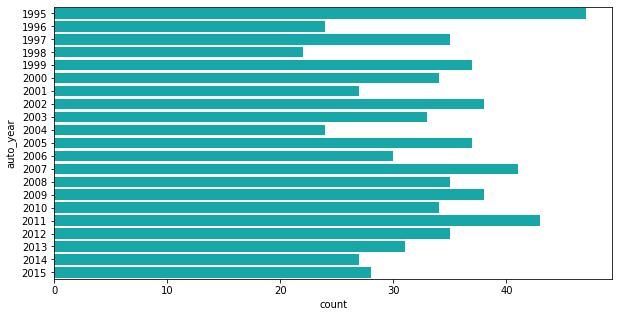

In [2808]:
#visualize auto year
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="auto_year", data=train, color="c");

# 5.2 Bivariable Analysis

**Analysis will be based on Independent variables and target variable to see the relationship between them**

* **Insured Sex vs Total Claim Amount**

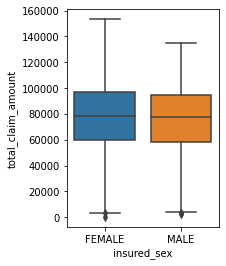

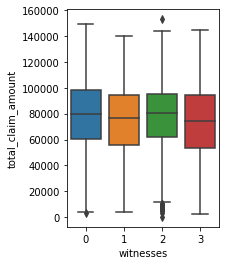

In [2809]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(x = 'insured_sex', y = 'total_claim_amount', data = train)
plt.show()

plt.figure(2)
plt.subplot(121)
sns.boxplot(x = 'witnesses', y = 'total_claim_amount', data = train);
plt.show()

* **visualize insured_sex**
* **total_claim_amount**
* **insured_education_level**

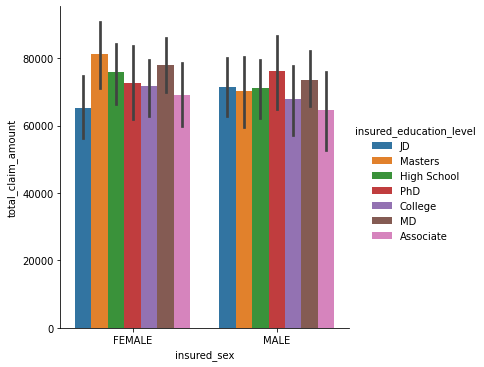

In [2810]:
#visualize insured_sex
#total_claim_amount
#insured_education_level
sns.catplot(x="insured_sex", y="total_claim_amount", hue="insured_education_level", kind="bar", data=train);

* **umbrella_limit**
* **total_claim_amount**

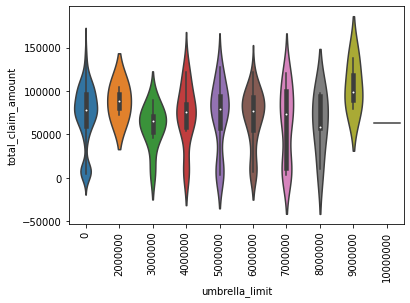

In [2811]:
#Using violin to plot the item types as well
plt.xticks(rotation = 90)
sns.violinplot(x = train.umbrella_limit, y= train.total_claim_amount);

* **incident_type**
* **age**
* **policy_state**

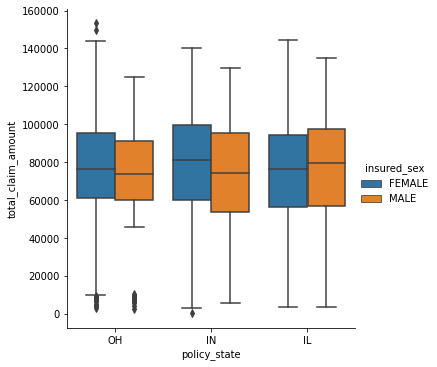

In [2812]:
#visuallize with Item_Type and Outlet_Size
sns.catplot(x="policy_state", y="total_claim_amount", hue="insured_sex",  kind="box", data= train);

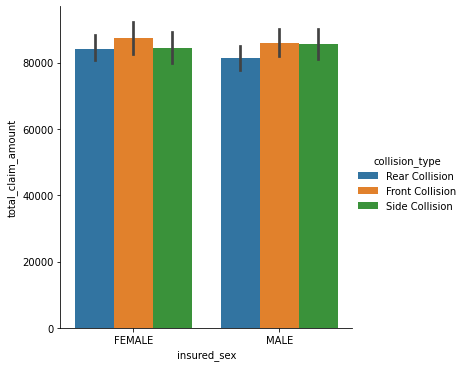

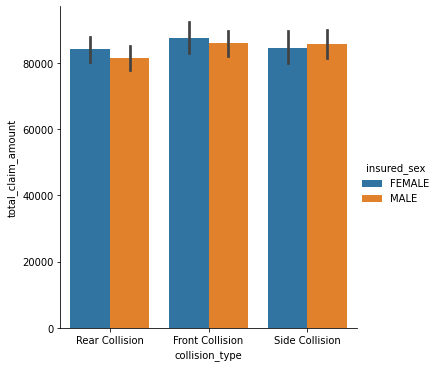

In [2813]:
#collision type, total_claim_amount, gender
sns.catplot(x="insured_sex", y="total_claim_amount", hue="collision_type", kind="bar", data=train);
sns.catplot(x="collision_type", y="total_claim_amount", hue="insured_sex", kind="bar", data=train);

# 6. Hanlding Missing Values and Outliers

In [2814]:
#sorting missing values columns and filtering 0 missing value cols
missing_value_cols = train.isnull().sum()
missing_value_cols = missing_value_cols[missing_value_cols != 0]
missing_value_cols.sort_values(ascending = False)

_c39                       700
property_damage            255
police_report_available    224
collision_type             117
dtype: int64

In [2815]:
def clean_data(df):
    #Replace missing values with the mode for categorical and or mean/median for numerical
    #train dataset
    df['property_damage'].fillna(df['property_damage'].mode()[0], inplace = True)
    df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace = True)
    df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
    
    #drop the _c39 column since it consists of nan only
    df = df.drop(['_c39'], axis = 'columns')
    
    return df

In [2816]:
#clean the datasets
train = clean_data(train)
test = clean_data(test)

In [2817]:
#sorting missing values columns and filtering 0 missing value cols
missing_value_cols = train.isnull().sum()
missing_value_cols = missing_value_cols[missing_value_cols != 0]
missing_value_cols.sort_values(ascending = False)

Series([], dtype: int64)

In [2818]:
#property damage
train.property_damage.value_counts()

NO     479
YES    221
Name: property_damage, dtype: int64

**Correlations on Data**

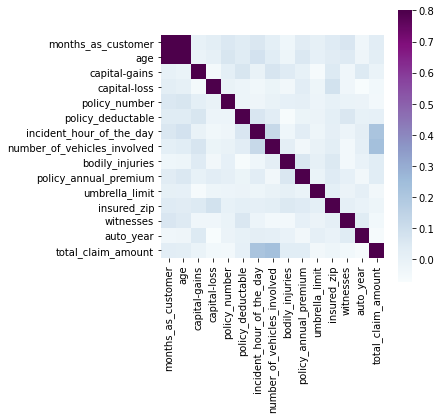

In [2819]:
#view Correlations
matrix = train.corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = 'BuPu');

<AxesSubplot:>

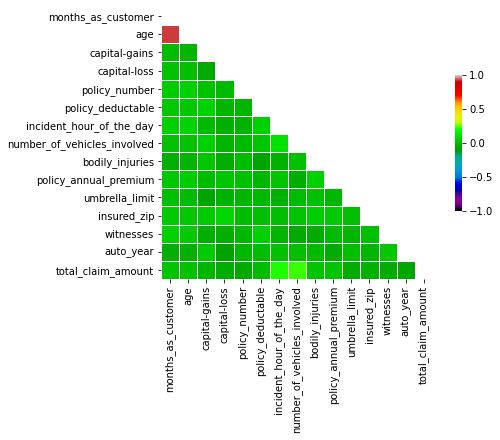

In [2820]:
#Compute the correlation matrix
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))
# Generate a custom diverging colormap
cmap = 'nipy_spectral'
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, vmin = -1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [2821]:
#creates shorth cut for training purposes
train_ = train.copy()
test_ = test.copy()

In [2822]:
#copy copies for training purposes
train = train_
test = test_

In [2823]:
#verify if deleted Customer ID is reinstated
assert 'Customer_ID' in train.columns

# 7. Pre-Processing Data<br>

<b> 7.1 One Hot Encoding </b>

In [2824]:
def one_hot_encoding(df):
    #import the library
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    #set targets
    columns_to_fit = [ 'insured_sex', 'insured_occupation', 'insured_relationship', 
                      'policy_state', 'property_damage',  'witnesses', 'police_report_available',
                      'incident_state', 'auto_model', 'auto_make','authorities_contacted', 'months_as_customer', 
                      'insured_hobbies', 'incident_city', 'witnesses', 'insured_education_level' ]
    #removed
    #movded 'collision_type', 'collision_type'
    #loop df and apply encoding
    for col in df.columns:
        if col in columns_to_fit:
            df[col] = le.fit_transform(df[col])
    return df 

In [2825]:
train.authorities_contacted.unique()

array(['Police', 'Fire', 'Other', 'Ambulance', 'None'], dtype=object)

In [2826]:
#apply one hot encoding
train = one_hot_encoding(train)
test = one_hot_encoding(test)

In [2827]:
f'Education_Level: {train.insured_education_level[0]}'

'Education_Level: 3'

<b> 7.2 Feature Engineering

In [2828]:
def auto_age(df):
    
    #calculate the years of the auto_year or car
    from datetime import datetime
    current_date_time = datetime.now()
    #replace the YYYY date with number of years
    df['auto_age'] = (current_date_time.year - df['auto_year'])
    #add the years_as_customer
    df['years_as_customer'] = df.months_as_customer//12
    #add the months_out_of_12_as_customer
    df['no_months_as_customer'] = df.months_as_customer%12
    
    return df

In [2829]:
#apply feature engineering on the datasets
train = auto_age(train)
test = auto_age(test)

In [2830]:
#verify processing: years and months of customer 1
f'ID: {train.Customer_ID[0]}, Years: {train.years_as_customer[0]}, Months: {train.no_months_as_customer[0]}'

'ID: Customer_541, Years: 16, Months: 7'

In [2831]:
def preprocessing_datasets(df):
    #add policy period by the time of the incident
    #use copy df to create it and add to the original df
    dftr = df.copy()
    dftr['incident_date'] = pd.to_datetime(dftr['incident_date'])
    dftr['policy_bind_date'] = pd.to_datetime(dftr['policy_bind_date'])
    df['policy_period'] = (dftr.incident_date - dftr.policy_bind_date)
    #Convert days in policy_period from dtype timedelta to int64
    df['policy_period'] = df['policy_period'].dt.days
     #convert string float fractions in policy_csl into floats
    df_ = df.copy()
    df_[["numerator", "denominator"]] = df_["policy_csl"].str.split("/", expand=True)
    df["policy_csl_float"] = df_["numerator"].astype(float) / df_["denominator"].astype(float)

    return df

In [2832]:
#convtert the dates
train = preprocessing_datasets(train)
test = preprocessing_datasets(test)

In [2833]:
#confirm processing: policy_period is the number of days of the policy when the accident took place
f'ID: {train.Customer_ID[0]}, Policy period: {test.policy_period[0]} days , Policy CLS: {train.policy_csl_float[0]}'

'ID: Customer_541, Policy period: 182 days , Policy CLS: 0.5'

<b>7.3 Drop unwanted columns</b>

In [2834]:
#appply function to delete columns
def drop_columns(df):
    
    #set targets
    columns_to_filter = [ 'Customer_ID','policy_csl','incident_location', 'policy_number', 'policy_bind_date', 
                         'incident_city', 'incident_state', 'incident_date', 'months_as_customer',
                        'auto_year', 'policy_period', 'insured_zip']

    
    #loop df and delete columns
    for col in df.columns:
        if col in  columns_to_filter:
            df = df.drop(col, axis = 1)
    
    return df 

In [2835]:
#drop unwanted columns
train = drop_columns(train)
test = drop_columns(test)

In [2836]:
#verify dropped columns
assert 'Customer_ID' not in train.columns

In [2837]:
#copy data
df_train = train.copy()
df_test = test.copy()

# 8. Building The Model

In [2838]:
#drop target variable: total_claim_amount and assign it to y
X = train.drop('total_claim_amount', axis = 1)
y = train.total_claim_amount

In [2839]:
#Creating Dummies
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [2840]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [2841]:
#import the libraries
#import lib and mod
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#instantiate the model
model = LinearRegression()
#set parameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)

#fit/train the model
grid.fit(X_train, y_train);

In [2842]:
#predict the X_test
y_pred_1 = grid.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_1))
print(f'Grid Model RMSE:{rmse}')

Grid Model RMSE:20878.17626758436


# Model 2

In [2843]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression
#Instantiate the model
regress_2 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)
#fit the model
regress_2.fit(X_train, y_train);

In [2844]:
#prediction with GB
y_pred_2 = regress_2.predict(X_test)

#root mean square error and mean squeare error of both models
MSE = np.square(np.subtract(y_test,y_pred_2)).mean()
rmse = sqrt(mean_squared_error(y_test, y_pred_2))
print(f'Regress_2 Model RMSE: {rmse}, MSE: {MSE}')

Regress_2 Model RMSE: 21789.521358081238, MSE: 474783241.01427805


# Model 3: GradientBoostingRegressor and AdaBoostRegressor

In [2845]:
#import libraries
from sklearn  import ensemble #can also use sklearn.ensemble import GradientBoostRegressor
#set parameters
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#fit GBR
reg_ = ensemble.GradientBoostingRegressor(**params)
reg_.fit(X_train, y_train);

In [2846]:
#fit adaboost classifier
reg_1=ensemble.AdaBoostRegressor()
reg_1.fit(X_train, y_train);

In [2847]:
#prediction with GB and AB
reg_pred = reg_.predict(X_test)
reg1_pred = reg_1.predict(X_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, reg_pred))
rmse1 = sqrt(mean_squared_error(y_test,reg1_pred))
rmse, rmse1

(21077.15101966625, 20451.293069809726)

# Randomized Search

In [2848]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

#instantiate the model
model = LinearRegression()
#set parameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)

#fit/train the model
grid.fit(X_train, y_train);

In [2849]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train);
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha);

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x241A8F30>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.6618540233265281
0.470122816600112


In [2850]:
#prediction with GB and AB
rs_pred = rsearch.predict(X_test)
grid_pred = grid.predict(X_test)
#root mean square error
rmse = sqrt(mean_squared_error(y_test, rs_pred))
rmse1 = sqrt(mean_squared_error(y_test, grid_pred))
rmse, rmse1

(20774.743731803217, 20878.17626758436)

# Polynomial and Linear Regression

In [2851]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2852]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X_train,y_train);

In [2853]:
#predict wit linear
linear_pred=lm.predict(X_test)
#predict with polynomial
poly_pred=pipe.predict(X_test)

In [2854]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y_test,poly_pred)))
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y_test,linear_pred)))

RMSE for Polynomial Regression=> 137711.7309840463
RMSE for Linear Regression=> 20756.684446860014


# Ordinary Least Squares

In [2855]:
#import libraries
import statsmodels.api as sm
# adding a constants
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
#train the model
model = sm.OLS(y_train, X_train).fit()

In [2856]:
#prediction with GB and AB
ols_pred = model.predict(X_test) 
#root mean square error
rmse = sqrt(mean_squared_error(y_test, ols_pred))
rmse

20756.684446091116

# Simplified LinearRegression Model

<b> LRM</b>

In [2857]:
#import mse
from sklearn.metrics import mean_squared_error

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lin_reg_mod = LinearRegression()
#fit the model
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2859]:
#make a prediction
final_pred = lin_reg_mod.predict(X_test)
#RMSE
rmse = (sqrt(mean_squared_error(y_test, final_pred)))
rmse

20756.684446860014

In [2860]:
final_pred = lin_reg_mod.predict(test)
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')
submission['total_claim_amount'] = final_pred
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']
#Convert submission to .csv file format
submission.to_csv('final_pred_model.csv', index = False)

# Complex Linear Regression Models

In [2861]:
#split test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# import necessary libraries
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot


# 1. evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)

In [2862]:
# 2. plot the dataset and the model's line of best fit
def best_fit(X, y, model):
    #fits the model to the training data
    model.fit(X, y)
    #return the fitted model
    return model

# 3. define the model, evalutate and fit it
model = LinearRegression()
# evaluate model
results = evaluate_model(X_test, y_test, model)
#predict results
print(f'Mean MAE:{mean(results)}, STD: {std(results)}')
# fit the model
fitted_model = best_fit(X_train, y_train, model)

Mean MAE:19407.932341490352, STD: 3897.1101134635887


In [2863]:
# 3. define the model, evalutate and fit it
model = LinearRegression()
# evaluate model
results = evaluate_model(X_test, y_test, model)
#predict results
print(f'Mean MAE:{mean(results)}, STD: {std(results)}')
# fit the model
fitted_model = best_fit(X_train, y_train, model)
#predict the target
pred_results = fitted_model.predict(X_test)
#RMSE
rmse = (sqrt(mean_squared_error(y_test, pred_results)))
rmse

Mean MAE:19407.932341490352, STD: 3897.1101134635887


20756.684446860014

# Linear Regression with QuantileTransformer

In [2864]:
#import libraries
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer


transformer = QuantileTransformer(output_distribution = 'normal')
regressor = LinearRegression()
regression_model_3 = TransformedTargetRegressor(regressor = regressor, transformer = transformer)
#Model3 with transformed target variable 
regression_model_3.fit(X_train, y_train);

In [2865]:
#predict and measure RMSE
y_pred_3 = regression_model_3.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_3))
f'Root Mean Square Error: {rmse}'

'Root Mean Square Error: 20701.980818671047'